In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models from Scikit learn
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
df = pd.read_csv('energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.shape

(19735, 29)

In [5]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

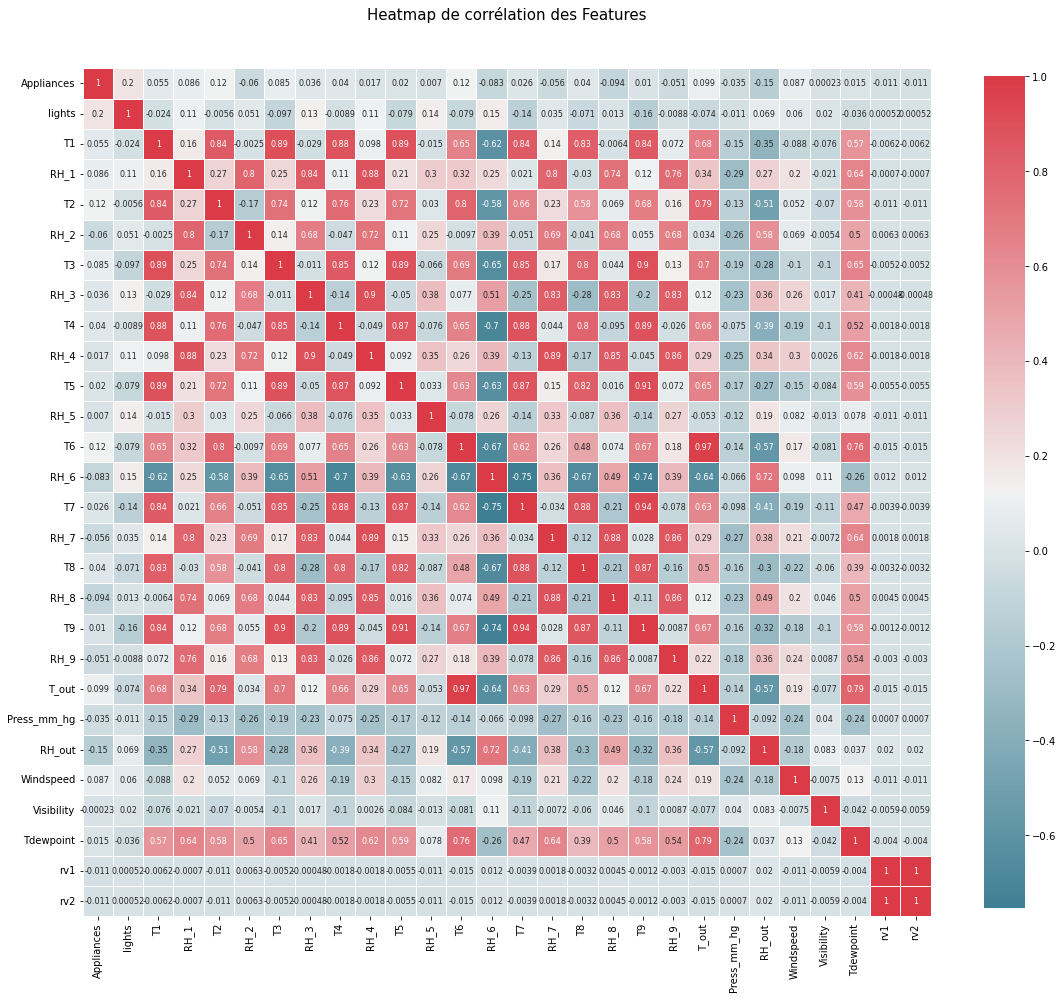

In [7]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(19, 17))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':8 }
    )
    
    
    plt.title('Heatmap de corrélation des Features', y=1.05, size=15)

correlation_heatmap(df)

In [8]:
df.drop(['rv2', 'rv1', 'Visibility'], axis = 1)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,5.3
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,5.2
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,5.1
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,5.0
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,13.3
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,13.3
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,13.3
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,13.2


In [9]:
df.drop(['date', 'lights'], axis = 1)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

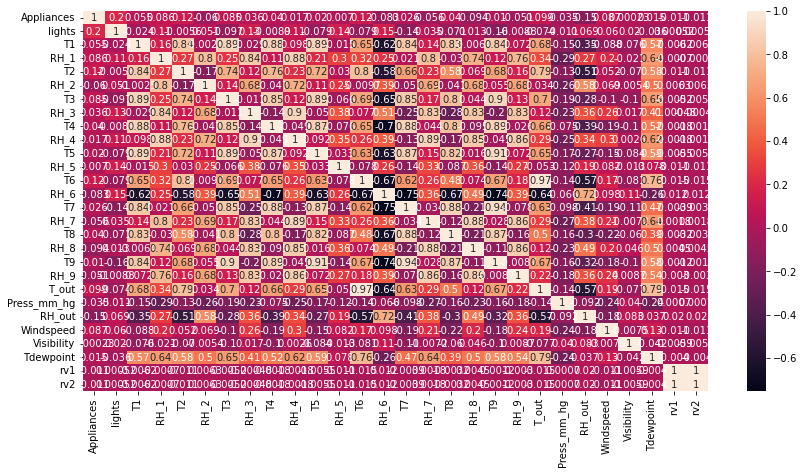

In [22]:
fig, ax = plt.subplots(figsize=(14, 7))
ax = sns.heatmap(df.corr(),annot=True);

In [23]:
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import  Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [24]:
y = df['Appliances']
x = df.drop(['Appliances','date'], axis = 1)
x.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13814, 27), (5921, 27), (13814,), (5921,))

In [26]:
#putting all model in a dic
models = {"XGBoost Regressor": XGBRegressor(),
         "DecisionTree Regressor": DecisionTreeRegressor(),
         "Random Forest": RandomForestRegressor(),
         "Catboost": CatBoostRegressor(),
         "KNeighborsRegressor": KNeighborsRegressor(),
         "Ridge": Ridge(),
         "LinearRegression": LinearRegression(),
         "SVR": SVR(),
         "gradientboosting": GradientBoostingRegressor(),
         }

In [27]:
#setting up a function to fit and score model

def fit_and_score(models, x_train, x_test, y_train, y_test):
  
    """
    fits and evaluates given machine learning models
    models: a dictionary of different scikit learn machine learning models
    X_train: Training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # setting up a random seed
    np.random.seed(42)
    
    model_scores = {}
    #looping through models
    for name , model in models.items():
        #fitting the modelto the data
        model.fit(x_train, y_train)
        #evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores 

In [29]:
%%time
scores = fit_and_score(models=models,
                              x_train=x_train,
                              x_test=x_test,
                              y_train=y_train,
                              y_test=y_test)
scores

Learning rate set to 0.061994
0:	learn: 102.2123986	total: 381ms	remaining: 6m 20s
1:	learn: 101.4781239	total: 394ms	remaining: 3m 16s
2:	learn: 100.9133627	total: 406ms	remaining: 2m 14s
3:	learn: 100.3000243	total: 416ms	remaining: 1m 43s
4:	learn: 99.7874298	total: 428ms	remaining: 1m 25s
5:	learn: 99.2722550	total: 442ms	remaining: 1m 13s
6:	learn: 98.8330969	total: 457ms	remaining: 1m 4s
7:	learn: 98.3634101	total: 472ms	remaining: 58.5s
8:	learn: 97.8751382	total: 488ms	remaining: 53.7s
9:	learn: 97.4595493	total: 502ms	remaining: 49.7s
10:	learn: 97.0843061	total: 517ms	remaining: 46.4s
11:	learn: 96.7169330	total: 529ms	remaining: 43.6s
12:	learn: 96.4021705	total: 543ms	remaining: 41.2s
13:	learn: 96.1272546	total: 559ms	remaining: 39.3s
14:	learn: 95.8297623	total: 587ms	remaining: 38.5s
15:	learn: 95.5761730	total: 617ms	remaining: 37.9s
16:	learn: 95.3255363	total: 632ms	remaining: 36.6s
17:	learn: 94.9860677	total: 649ms	remaining: 35.4s
18:	learn: 94.7321538	total: 664ms

159:	learn: 79.9711357	total: 2.77s	remaining: 14.6s
160:	learn: 79.9164321	total: 2.79s	remaining: 14.5s
161:	learn: 79.8225812	total: 2.81s	remaining: 14.5s
162:	learn: 79.7749487	total: 2.82s	remaining: 14.5s
163:	learn: 79.7188142	total: 2.84s	remaining: 14.5s
164:	learn: 79.6439758	total: 2.85s	remaining: 14.4s
165:	learn: 79.5840482	total: 2.86s	remaining: 14.4s
166:	learn: 79.5410447	total: 2.88s	remaining: 14.4s
167:	learn: 79.4587319	total: 2.89s	remaining: 14.3s
168:	learn: 79.4134026	total: 2.91s	remaining: 14.3s
169:	learn: 79.3272321	total: 2.92s	remaining: 14.3s
170:	learn: 79.2853169	total: 2.93s	remaining: 14.2s
171:	learn: 79.2093398	total: 2.94s	remaining: 14.2s
172:	learn: 79.1616817	total: 2.96s	remaining: 14.1s
173:	learn: 79.1171220	total: 2.97s	remaining: 14.1s
174:	learn: 79.0951322	total: 2.99s	remaining: 14.1s
175:	learn: 79.0042240	total: 3s	remaining: 14.1s
176:	learn: 78.9789111	total: 3.02s	remaining: 14s
177:	learn: 78.8899659	total: 3.04s	remaining: 14s


324:	learn: 71.3897067	total: 5.11s	remaining: 10.6s
325:	learn: 71.3464004	total: 5.13s	remaining: 10.6s
326:	learn: 71.3119946	total: 5.15s	remaining: 10.6s
327:	learn: 71.2959356	total: 5.16s	remaining: 10.6s
328:	learn: 71.2409535	total: 5.18s	remaining: 10.6s
329:	learn: 71.1862855	total: 5.19s	remaining: 10.5s
330:	learn: 71.1555795	total: 5.2s	remaining: 10.5s
331:	learn: 71.1288796	total: 5.21s	remaining: 10.5s
332:	learn: 71.0823364	total: 5.23s	remaining: 10.5s
333:	learn: 71.0610876	total: 5.24s	remaining: 10.4s
334:	learn: 71.0259636	total: 5.25s	remaining: 10.4s
335:	learn: 70.9999069	total: 5.27s	remaining: 10.4s
336:	learn: 70.9725701	total: 5.29s	remaining: 10.4s
337:	learn: 70.9504402	total: 5.32s	remaining: 10.4s
338:	learn: 70.8921370	total: 5.33s	remaining: 10.4s
339:	learn: 70.8110789	total: 5.34s	remaining: 10.4s
340:	learn: 70.7834245	total: 5.36s	remaining: 10.4s
341:	learn: 70.7607352	total: 5.37s	remaining: 10.3s
342:	learn: 70.7247802	total: 5.38s	remaining: 

485:	learn: 66.0697829	total: 7.44s	remaining: 7.87s
486:	learn: 66.0384914	total: 7.46s	remaining: 7.86s
487:	learn: 66.0215876	total: 7.47s	remaining: 7.84s
488:	learn: 65.9894755	total: 7.49s	remaining: 7.83s
489:	learn: 65.9630408	total: 7.51s	remaining: 7.81s
490:	learn: 65.9404812	total: 7.53s	remaining: 7.81s
491:	learn: 65.9297384	total: 7.55s	remaining: 7.8s
492:	learn: 65.8943600	total: 7.57s	remaining: 7.79s
493:	learn: 65.8659098	total: 7.58s	remaining: 7.77s
494:	learn: 65.8130112	total: 7.6s	remaining: 7.75s
495:	learn: 65.7915103	total: 7.62s	remaining: 7.74s
496:	learn: 65.7729160	total: 7.63s	remaining: 7.72s
497:	learn: 65.7428372	total: 7.65s	remaining: 7.71s
498:	learn: 65.7006744	total: 7.66s	remaining: 7.69s
499:	learn: 65.6753308	total: 7.68s	remaining: 7.68s
500:	learn: 65.6735844	total: 7.69s	remaining: 7.66s
501:	learn: 65.6606428	total: 7.71s	remaining: 7.64s
502:	learn: 65.6432396	total: 7.72s	remaining: 7.63s
503:	learn: 65.6135755	total: 7.73s	remaining: 7

653:	learn: 61.9017294	total: 9.93s	remaining: 5.25s
654:	learn: 61.8852438	total: 9.96s	remaining: 5.25s
655:	learn: 61.8667407	total: 9.98s	remaining: 5.23s
656:	learn: 61.8328914	total: 10s	remaining: 5.22s
657:	learn: 61.8192116	total: 10s	remaining: 5.2s
658:	learn: 61.7955446	total: 10s	remaining: 5.19s
659:	learn: 61.7619237	total: 10s	remaining: 5.18s
660:	learn: 61.7502728	total: 10.1s	remaining: 5.16s
661:	learn: 61.7342110	total: 10.1s	remaining: 5.15s
662:	learn: 61.7128082	total: 10.1s	remaining: 5.13s
663:	learn: 61.6904881	total: 10.1s	remaining: 5.12s
664:	learn: 61.6630569	total: 10.1s	remaining: 5.1s
665:	learn: 61.6520257	total: 10.1s	remaining: 5.09s
666:	learn: 61.6462825	total: 10.2s	remaining: 5.08s
667:	learn: 61.6232699	total: 10.2s	remaining: 5.07s
668:	learn: 61.6120076	total: 10.2s	remaining: 5.05s
669:	learn: 61.5951809	total: 10.2s	remaining: 5.04s
670:	learn: 61.5931303	total: 10.2s	remaining: 5.02s
671:	learn: 61.5487119	total: 10.3s	remaining: 5.01s
672

816:	learn: 58.5197298	total: 12.3s	remaining: 2.75s
817:	learn: 58.5061124	total: 12.3s	remaining: 2.74s
818:	learn: 58.4893699	total: 12.3s	remaining: 2.72s
819:	learn: 58.4542454	total: 12.3s	remaining: 2.71s
820:	learn: 58.4349726	total: 12.3s	remaining: 2.69s
821:	learn: 58.4297312	total: 12.4s	remaining: 2.67s
822:	learn: 58.4200831	total: 12.4s	remaining: 2.66s
823:	learn: 58.4094526	total: 12.4s	remaining: 2.64s
824:	learn: 58.3994495	total: 12.4s	remaining: 2.63s
825:	learn: 58.3663823	total: 12.4s	remaining: 2.61s
826:	learn: 58.3331177	total: 12.4s	remaining: 2.6s
827:	learn: 58.3187297	total: 12.4s	remaining: 2.58s
828:	learn: 58.3143716	total: 12.4s	remaining: 2.56s
829:	learn: 58.3014334	total: 12.4s	remaining: 2.55s
830:	learn: 58.2804122	total: 12.4s	remaining: 2.53s
831:	learn: 58.2683713	total: 12.5s	remaining: 2.52s
832:	learn: 58.2551410	total: 12.5s	remaining: 2.5s
833:	learn: 58.2320804	total: 12.5s	remaining: 2.48s
834:	learn: 58.2309585	total: 12.5s	remaining: 2

982:	learn: 55.5085650	total: 14.5s	remaining: 251ms
983:	learn: 55.5000886	total: 14.5s	remaining: 236ms
984:	learn: 55.4852290	total: 14.5s	remaining: 221ms
985:	learn: 55.4774866	total: 14.6s	remaining: 207ms
986:	learn: 55.4744395	total: 14.6s	remaining: 192ms
987:	learn: 55.4652475	total: 14.6s	remaining: 177ms
988:	learn: 55.4540073	total: 14.6s	remaining: 163ms
989:	learn: 55.4323245	total: 14.6s	remaining: 148ms
990:	learn: 55.4145561	total: 14.7s	remaining: 133ms
991:	learn: 55.3877665	total: 14.7s	remaining: 118ms
992:	learn: 55.3784026	total: 14.7s	remaining: 104ms
993:	learn: 55.3513812	total: 14.7s	remaining: 88.8ms
994:	learn: 55.3428206	total: 14.7s	remaining: 74ms
995:	learn: 55.3305844	total: 14.7s	remaining: 59.2ms
996:	learn: 55.3189460	total: 14.7s	remaining: 44.4ms
997:	learn: 55.2839171	total: 14.8s	remaining: 29.6ms
998:	learn: 55.2737552	total: 14.8s	remaining: 14.8ms
999:	learn: 55.2644717	total: 14.8s	remaining: 0us
Wall time: 2min 30s


{'XGBoost Regressor': 0.46722584741604334,
 'DecisionTree Regressor': 0.1357569742613094,
 'Random Forest': 0.5120244864149783,
 'Catboost': 0.4523592848793574,
 'KNeighborsRegressor': 0.16811784326659063,
 'Ridge': 0.16723404240167183,
 'LinearRegression': 0.16723589246482384,
 'SVR': -0.10563277831577667,
 'gradientboosting': 0.2607293866196718}

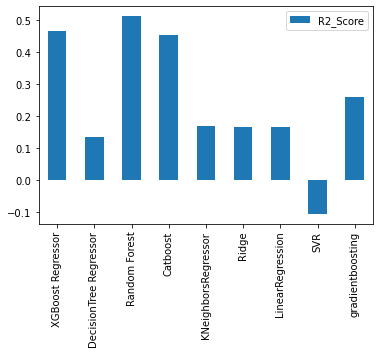

In [30]:
model_compare = pd.DataFrame(scores, index=['R2_Score'])
model_compare.T.plot.bar(); #T means transpose , so as to improve the plot

In [33]:
%%time
xgb_model = XGBRegressor()

xgb_model.fit(x_train, y_train)

Wall time: 3.4 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [34]:
xgb_model.score(x_test, y_test)

0.46722584741604334

In [31]:
%%time
randomF_model = RandomForestRegressor()

randomF_model.fit(x_train, y_train)

Wall time: 1min 12s


RandomForestRegressor()

In [35]:
y_preds = xgb_model.predict(x_test)
y_preds

array([ 37.840847, 134.17128 ,  50.706097, ...,  68.045   , 118.49094 ,
        61.27652 ], dtype=float32)

In [32]:
randomF_model.score(x_test, y_test)

0.5058622941702196

In [30]:
# making predictions
y_preds = randomF_model.predict(x_test)
y_preds

array([ 50.6, 104.5,  56.4, ...,  53.4, 117.2,  64.5])

In [31]:
mse = mean_squared_error(y_test, y_preds)
mse

5090.91383550076

In [32]:
np.sqrt(mse)

71.35064004969233

In [33]:
mae = mean_absolute_error(y_test, y_preds)
mae

34.30940719473062

In [34]:
df2 = pd.DataFrame(data={"actual values": y_test,
                    "predictions":y_preds})
df2

,actual values,predictions
8980,40,50.6
2754,90,104.5
9132,50,56.4
14359,50,71.7
8875,70,63.2
...,...,...
831,250,248.9
10993,60,61.2
11761,50,53.4
12364,110,117.2


In [38]:
df = df.drop(['date', 'lights'], axis = 1)

In [39]:
df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [50]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Appliances'])
Appliances = normalised_df['Appliances']


In [51]:
#Now, we split our dataset into the training and testing dataset. Recall that we
#had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, Appliances, test_size=0.3, random_state=42)

In [52]:
# Mean Absolute Error (MAE)

linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.05

In [53]:
# Residual Sum of Squares (RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

45.348

In [54]:
# Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.088

In [55]:
# R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) 

0.149

In [56]:
#Penalization Methods
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [57]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [58]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [59]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [60]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456662,-0.401113,-0.000000
1,T_out,-0.321969,-0.250943,0.000000
2,T2,-0.236198,-0.193899,0.000000
3,T9,-0.189977,-0.188615,-0.000000
4,RH_8,-0.157585,-0.156584,-0.000110
5,RH_out,-0.077748,-0.050642,-0.049557
6,RH_7,-0.044620,-0.046297,-0.000000
7,RH_9,-0.039808,-0.041707,-0.000000
8,T5,-0.015645,-0.020714,-0.000000
9,T1,-0.003242,-0.021515,0.000000


In [61]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [62]:
# Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.088

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

In [9]:
#rename columns
column_names = {'T2':'Temperature_in_living_room_area','T6':'Temperature_outside_the_building','Date':'time_year_month',
                'Appliances':'energy_use_in_Wh','lights':'energy_use_ of_light_fixtures','T1':'Temperature_kitchen'
                'RH_1':'Humidity_kitchen,'RH_2':'Humidity_living_room_area','T3':'Temperature_laundry',
                'RH_3':'Humidity_in_laundry','T4':'Temperature_in_office_room','RH_4':'Humidity_in_office_room',
                'T5':'Temperature_in_bathroom','RH_5':'Humidity_in_bathroom','T6':'Temperature_outside_the_building',
                'RH_6':'Humidity_outside_the_building','T7':'Temperature_in_ironing_room','RH_7':'Humidity_in_ironing_room',
                'T8':'Temperature_in_teenager_room_2','RH_8':'Humidity_in_teenager_room_2','T9':'Temperature_in_parents_room',
                'RH_9':'Humidity_in_parents_room','To':'Temperature_outside_Chievres','Pre':'Pressure_Chievres',
                'RH_out':'Humidity_outside_Chievres','Win':'Wind_speed_Chievres','Vis':'Visibility_Chievres',
                'Tde':'wpoint_Chievres','rv1':'Random_variable_1','rv2':'Random_variable_2'}

SyntaxError: invalid syntax (Temp/ipykernel_12712/622054436.py, line 4)

In [20]:
df = df.drop(columns=['date'])

KeyError: "['date'] not found in axis"

In [11]:
df = df.rename(columns=column_names)
simple_linear_reg_df = df[['Temperature_in_living_room_area', 'Temperature_outside_the_building']].sample(15, random_state=2)

<AxesSubplot:xlabel='Temperature_in_living_room_area', ylabel='Temperature_outside_the_building'>

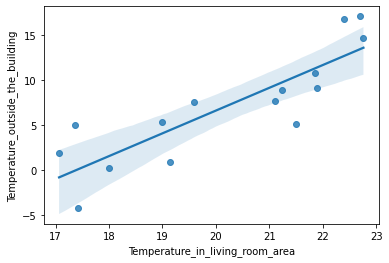

In [12]:
#regression plot
sns.regplot(x="Temperature_in_living_room_area", y="Temperature_outside_the_building",
data=simple_linear_reg_df)

In [14]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Temperature_outside_the_building', 'date'])
Temperature_outside_the_building = normalised_df['Temperature_outside_the_building']

ValueError: could not convert string to float: '11-01-2016 17:00'